In [22]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prince
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [23]:
data = pd.read_csv('../data/Customer_churn.csv',index_col="customerID")
print(f'Data shape: {data.shape}')
data.head()

Data shape: (7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
def tenure(data):
    # if the customer stays with the company <= 1 year return 'Short' label
    # otherwise return 'Long'
    if 0 < data  <= 24 :
        return 'Short'
    else:
        return 'Long'

def charges(data):
    # discretize monthly charges variable 
    if 0 < data  <= 70 :
        return 'LowCharge'
    else:
        return 'HighCharge'

data['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace=True)
data['tenure'] = data['tenure'].apply(tenure)
data['MonthlyCharges'] = data['MonthlyCharges'].apply(charges)
data.drop(['TotalCharges',"Churn"], axis=1, inplace=True)

In [25]:
data = data.apply(lambda x: x.astype("category").cat.codes,axis=0)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int8 
 1   SeniorCitizen     7043 non-null   int8 
 2   Partner           7043 non-null   int8 
 3   Dependents        7043 non-null   int8 
 4   tenure            7043 non-null   int8 
 5   PhoneService      7043 non-null   int8 
 6   MultipleLines     7043 non-null   int8 
 7   InternetService   7043 non-null   int8 
 8   OnlineSecurity    7043 non-null   int8 
 9   OnlineBackup      7043 non-null   int8 
 10  DeviceProtection  7043 non-null   int8 
 11  TechSupport       7043 non-null   int8 
 12  StreamingTV       7043 non-null   int8 
 13  StreamingMovies   7043 non-null   int8 
 14  Contract          7043 non-null   int8 
 15  PaperlessBilling  7043 non-null   int8 
 16  PaymentMethod     7043 non-null   int8 
 17  MonthlyCharges    7043 

In [27]:
print(f'Data shape: {data.shape}')
data.head()

Data shape: (7043, 18)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,1
5575-GNVDE,1,0,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1
3668-QPYBK,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,1
7795-CFOCW,1,0,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1
9237-HQITU,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,0


In [28]:
from prinpy.glob import NLPCA

In [29]:
from keras import optimizers 
optimizers.Adam

tensorflow.python.keras.optimizer_v2.adam.Adam

In [30]:
pca = NLPCA()
data_new = pca.preprocess(data.values)
pca.fit(data_new, epochs = 150, nodes = 15, lr = .01, verbose = 0)
proj, curve_pts = pca.project(data_new)

In [31]:
proj

array([[3.9864492e-04],
       [3.9864492e-04],
       [3.9864492e-04],
       [3.9864492e-04],
       [3.9864492e-04],
       [3.9864492e-04],
       [3.9864492e-04],
       [3.9864492e-04],
       [3.9864492e-04],
       [3.9864492e-04],
       [3.9864492e-04],
       [3.9864492e-04],
       [3.9864492e-04],
       [3.9864492e-04],
       [3.9864492e-04],
       [3.9864492e-04],
       [9.9911386e-01],
       [3.9864494e-04]], dtype=float32)

In [38]:
curve_pts

array([[-5.7297122e-01, -6.6121113e-01, -6.2299138e-01, ...,
        -6.2144530e-01, -5.3979740e-02,  3.9864492e-04],
       [-5.7297122e-01, -6.6121113e-01, -6.2299138e-01, ...,
        -6.2144530e-01, -5.3979740e-02,  3.9864492e-04],
       [-5.7297122e-01, -6.6121113e-01, -6.2299138e-01, ...,
        -6.2144530e-01, -5.3979740e-02,  3.9864492e-04],
       ...,
       [-5.7297122e-01, -6.6121113e-01, -6.2299138e-01, ...,
        -6.2144530e-01, -5.3979740e-02,  3.9864492e-04],
       [-5.7297122e-01, -6.6121113e-01, -6.2299138e-01, ...,
        -6.2144530e-01, -5.3979740e-02,  3.9864494e-04],
       [ 6.2702799e-01,  3.9588785e-01,  4.2210820e-01, ...,
         3.7912360e-01, -1.1069189e+00,  9.9911386e-01]], dtype=float32)

In [36]:
data_new.shape

(18, 7043)

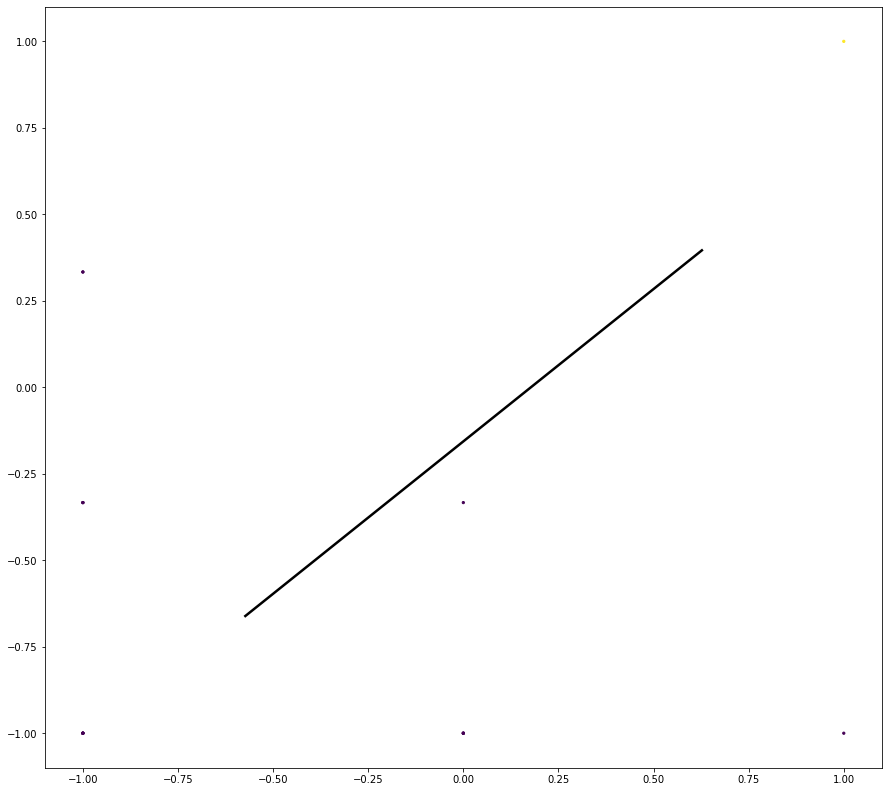

In [37]:
fig, plot = plt.subplots(figsize = (15,14))
plt.scatter(data_new[:,0], 
            data_new[:,1], 
            s = 5, 
            c = proj.reshape(-1), 
            cmap = 'viridis')
plt.plot(curve_pts[:,0], 
         curve_pts[:,1], 
         color = 'black',
         linewidth = '2.5')